# Homework 4: Data Visualization
- **Name**:  Shreya Munje
- **UB Username**: smunje
- **UB Person Number**: 50548381

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

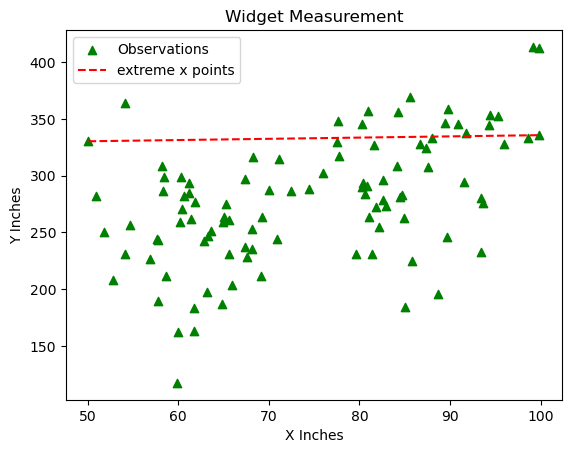

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/PRANAV/OneDrive/Desktop/Programming Analytics/scatter_data.csv')

x = data.iloc[:, 0]  # Assuming 'x' data is in the first column
y = data.iloc[:, 1]  # Assuming 'y' data is in the second column

plt.scatter(x, y, marker='^', color='green', label='Observations')

min_x = x.min()
max_x = x.max()

plt.plot([min_x, max_x], [y[x.idxmin()], y[x.idxmax()]], linestyle='--', color='red', label='extreme x points')

plt.title('Widget Measurement')

plt.xlabel('X Inches')
plt.ylabel('Y Inches')

plt.legend()

plt.show()

### Problem 2 - Histogram

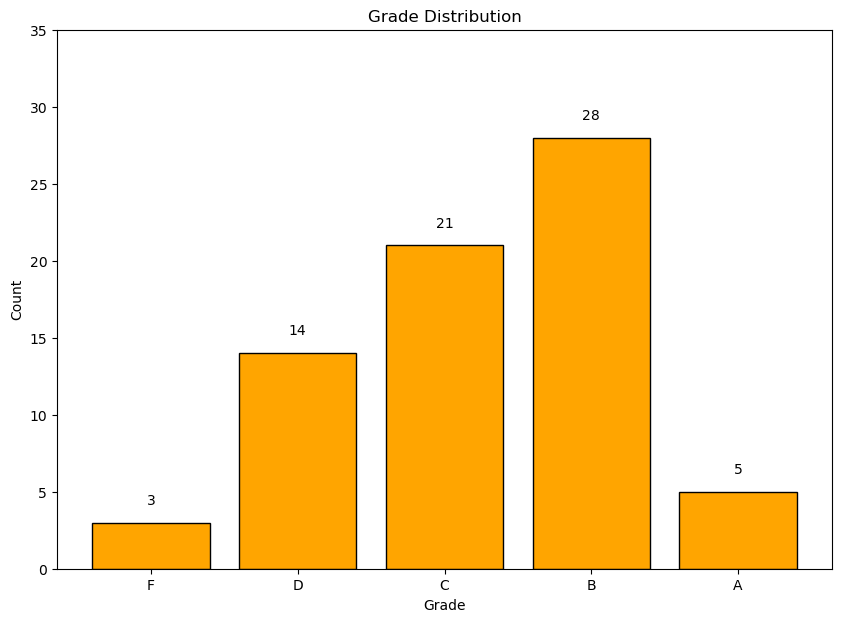

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/PRANAV/OneDrive/Desktop/Programming Analytics/student_grades.csv')
selected_columns = data.iloc[:, [0, 1]]

# Specify the bins and labels
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']
selected_columns['Grade'] = pd.cut(selected_columns.iloc[:, 1], bins=bins, labels=labels, right=False)
# Count the number of students in each grade category
grade_counts = selected_columns[ 'Grade'].value_counts().reindex(labels)
# Create the histogram
plt.figure(figsize=(10, 7))
plt.bar(labels, grade_counts, color='orange', edgecolor='black')

for i, count in enumerate(grade_counts):
    plt.text(i, min(count + 1, 35), str(count), ha='center', va='bottom')  # Reduce the gap to 2

plt.xlabel('Grade')
plt.ylabel('Count')  # Updated Y-axis label

plt.title('Grade Distribution')

plt.ylim(0, 35)

plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/PRANAV/OneDrive/Desktop/Programming Analytics/solution_data.csv')

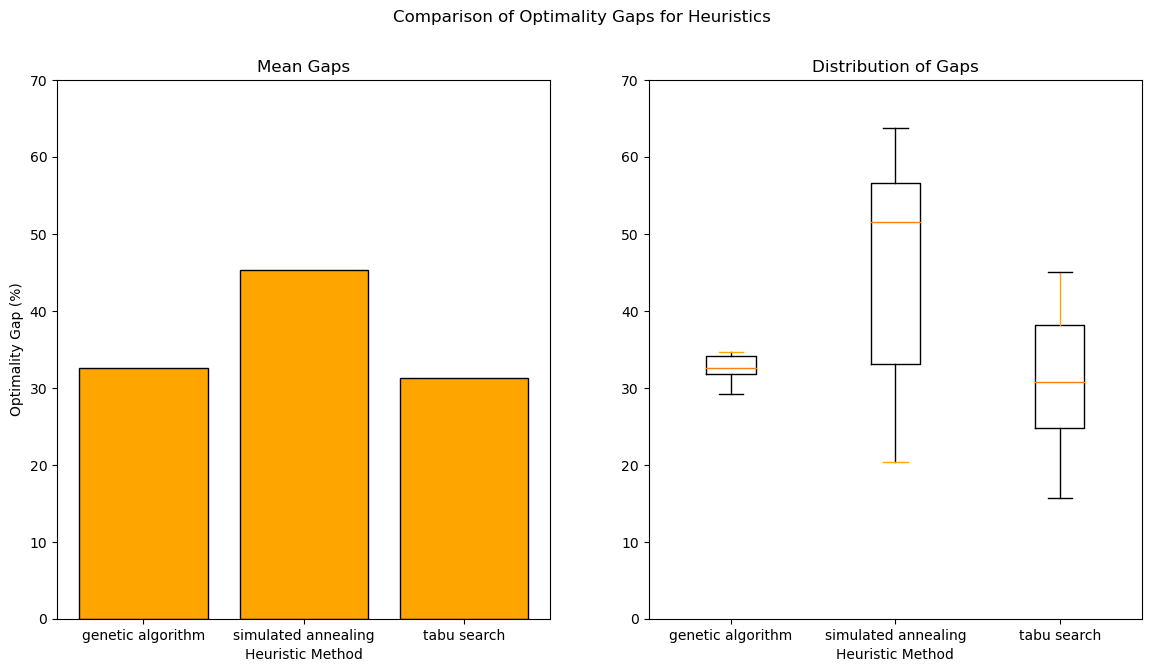

In [5]:
df['gap'] = df.groupby('% Problem')['Value'].transform(max) - df['Value']
df['gap_percent'] = (df['gap'] / df.groupby('% Problem')['Value'].transform(max)) * 100
heuristic_df = df[df['SolnMethod'] != 'optimal']
avg_gaps = heuristic_df.groupby('SolnMethod')['gap_percent'].mean().reset_index()
boxplot_data = heuristic_df.groupby('SolnMethod')['gap_percent'].apply(list).reset_index(name='gaps')
plt.figure(figsize=(14, 7))

# Barplot
plt.subplot(1, 2, 1)
plt.bar(avg_gaps['SolnMethod'], avg_gaps['gap_percent'], color='orange', edgecolor='black')
plt.xlabel('Heuristic Method')
plt.ylabel('Optimality Gap (%)')
plt.title('Mean Gaps')
plt.ylim(0, 70)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(boxplot_data['gaps'], labels=boxplot_data['SolnMethod'])
plt.xlabel('Heuristic Method')
plt.title('Distribution of Gaps')
plt.ylim(0, 70)


for median in plt.gca().lines[4::6]:
    median.set_color('orange')

plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.show()

--- 
## Part 2 - Explore New Plot Types

The joint kernel density estimate (KDE) plot provides a visual representation of the bivariate distribution between two variables ('anxiety_level' and 'depression').

- **URL of Example Code**: https://seaborn.pydata.org/examples/joint_kde.html
- **URL of Sample Data**: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

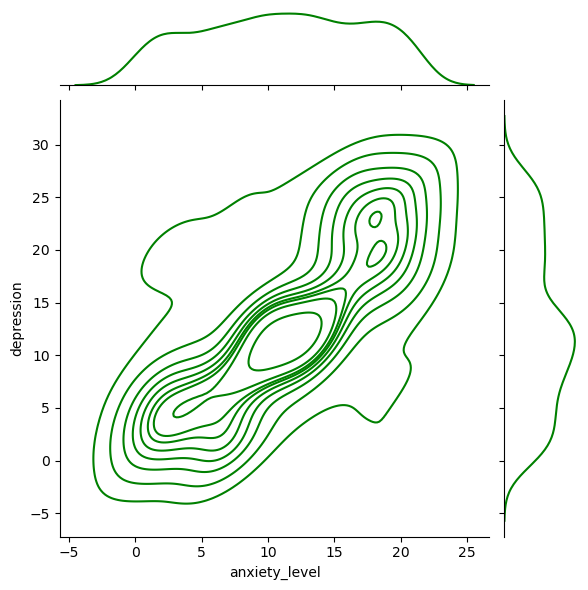

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

data = pd.read_csv("C:/Users/PRANAV/OneDrive/Desktop/StressLevelDataset.csv")
print(data.head(5))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the CSV file into a DataFrame
file_path = 'C:/Users/PRANAV/OneDrive/Desktop/StressLevelDataset.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Select the two columns for the joint KDE plot
column1 = 'anxiety_level'
column2 = 'depression'

# Create a joint KDE plot
sns.jointplot(x=column1, y=column2, data=df, kind='kde', color='g')

# Show the plot
plt.show()

The concentration of density in certain areas gives an idea of the strength of the relationship between the two variables. Higher density areas indicate stronger relationship between'anxiety_level' and 'depression'.In this plot,contours are irregular or skewed which suggests a more complex relationship.